In [2]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

from sklearn.model_selection import train_test_split       #split data
from sklearn.experimental import enable_iterative_imputer  #deal with missing data
from sklearn.impute import IterativeImputer                #deal with missing data
from sklearn.model_selection import KFold                  #deal with validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

import seaborn as sns                                      #deal with heatmap

In [3]:
df_lir=pd.read_csv('data/total lir/1675_CIGALE_FINAL_SOURCES_redchi10_with_HSC_id.csv', low_memory=False)

In [4]:
test_imp = pd.read_csv('data/test_imp.csv',low_memory=False,index_col=0)
testz_imp = pd.read_csv('data/test_imp_z.csv',low_memory=False,index_col=0)

In [5]:
# testz_imp[testz_imp['z']<0]


In [84]:
testz_imp=testz_imp[testz_imp['z']>0]
# testz_imp=np.log10(testz_imp)

In [85]:
testz_imp.rename(columns={'z': 'photz'})

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2,photz
0,23.481,21.951,21.276000,20.823000,20.353000,19.743000,19.761000,19.981000,20.035586,18.295000,17.872000,17.958133,18.181155,19.546483,19.950000,20.125000,19.926000,19.899000,0.562
1,26.554,25.860,25.340000,24.684173,23.924000,20.876743,20.327000,20.488000,21.273808,19.930666,18.985908,17.986864,17.066079,16.957309,21.471000,20.717000,21.103990,20.320064,2.270
2,21.705,20.215,19.425000,19.104000,18.851000,18.129000,18.390000,18.999000,19.816078,18.816000,18.165514,18.451043,18.180000,17.662294,18.570000,18.930000,18.578000,18.629000,0.385
3,23.230,21.963,20.791000,20.283000,20.135000,19.846000,19.969000,20.292000,19.918274,20.216799,19.141640,17.633000,18.425410,18.861494,19.999000,20.528000,19.500000,19.559000,0.626
4,25.489,24.316,23.002000,22.256000,21.737000,19.390000,19.018000,19.693000,20.352496,19.140361,18.201473,18.713837,18.201302,17.666628,19.369000,19.830000,19.292000,19.272000,1.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,25.607,26.476,25.021000,24.697000,24.021263,20.185611,19.273140,18.596616,18.272062,18.642593,17.711090,16.136083,15.861000,16.388000,19.569712,18.863089,19.097859,18.283329,1.673
67706,26.014,26.075,25.452000,24.967000,24.655311,21.450084,20.874743,20.453667,19.467239,18.317585,17.560884,16.860255,16.671000,16.633859,20.778428,19.841193,20.271951,19.535944,1.711
67707,27.203,26.535,25.506092,24.784231,24.312535,20.994403,20.610906,20.125717,20.475899,19.960054,19.272493,17.904458,17.304297,16.718707,21.003361,20.744431,19.984328,20.083644,1.863
67708,27.464,25.471,25.223723,24.880000,24.348109,21.333444,20.373441,20.074025,18.641485,18.692440,17.787427,17.754842,17.263000,16.632535,20.488595,19.768181,20.273386,19.185252,3.746


In [64]:
# a=testz_imp[testz_imp['z']<0]
# a
# # a.dropna()

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2,z


In [86]:
lir_train=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','photz']
lir_target=['bayes.agn.luminosity','bayes.agn.fracAGN']
lir_trainsz=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','specz']

In [87]:
lirtrain=df_lir[lir_train]
lirtar=df_lir[lir_target]
lirtrainsz=df_lir[lir_trainsz]

In [88]:
lirtar=lirtar[lirtar>0].dropna()
lirtrain=lirtrain.loc[lirtar.index]
lirtar['tlir']=0
lirtar['tlir']=lirtar[lir_target[0]]/lirtar[lir_target[1]]

lirtarget=np.log10(lirtar['tlir'])
loglirtrain=np.log10(lirtrain)




In [89]:
lirsz=np.log10(lirtrainsz[lirtrainsz['specz']>0])
lirtargetsz=lirtarget.loc[lirsz.index]
# lirtrainnz=lirtrain[:-1]

In [91]:
lirtargetsz

0      37.505245
1      37.944996
2      36.134315
3      39.183914
4      36.837928
         ...    
371    38.832416
372    36.821245
373    37.496693
374    38.264096
375    36.465964
Name: tlir, Length: 376, dtype: float64

In [29]:
testz_imp

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2,z
0,23.481,21.951,21.276000,20.823000,20.353000,19.743000,19.761000,19.981000,20.035586,18.295000,17.872000,17.958133,18.181155,19.546483,19.950000,20.125000,19.926000,19.899000,0.562
1,26.554,25.860,25.340000,24.684173,23.924000,20.876743,20.327000,20.488000,21.273808,19.930666,18.985908,17.986864,17.066079,16.957309,21.471000,20.717000,21.103990,20.320064,2.270
2,21.705,20.215,19.425000,19.104000,18.851000,18.129000,18.390000,18.999000,19.816078,18.816000,18.165514,18.451043,18.180000,17.662294,18.570000,18.930000,18.578000,18.629000,0.385
3,23.230,21.963,20.791000,20.283000,20.135000,19.846000,19.969000,20.292000,19.918274,20.216799,19.141640,17.633000,18.425410,18.861494,19.999000,20.528000,19.500000,19.559000,0.626
4,25.489,24.316,23.002000,22.256000,21.737000,19.390000,19.018000,19.693000,20.352496,19.140361,18.201473,18.713837,18.201302,17.666628,19.369000,19.830000,19.292000,19.272000,1.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,25.607,26.476,25.021000,24.697000,24.021263,20.185611,19.273140,18.596616,18.272062,18.642593,17.711090,16.136083,15.861000,16.388000,19.569712,18.863089,19.097859,18.283329,1.673
67706,26.014,26.075,25.452000,24.967000,24.655311,21.450084,20.874743,20.453667,19.467239,18.317585,17.560884,16.860255,16.671000,16.633859,20.778428,19.841193,20.271951,19.535944,1.711
67707,27.203,26.535,25.506092,24.784231,24.312535,20.994403,20.610906,20.125717,20.475899,19.960054,19.272493,17.904458,17.304297,16.718707,21.003361,20.744431,19.984328,20.083644,1.863
67708,27.464,25.471,25.223723,24.880000,24.348109,21.333444,20.373441,20.074025,18.641485,18.692440,17.787427,17.754842,17.263000,16.632535,20.488595,19.768181,20.273386,19.185252,3.746


In [93]:
loglirtrain

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2,photz
0,1.292500,1.267852,1.250591,1.242839,1.236033,1.230806,1.247875,1.244178,1.201834,1.187295,1.180298,1.171814,1.169880,1.148788,1.237895,1.243261,1.234061,1.240250,-0.752027
1,1.407153,1.370291,1.346333,1.332054,1.328889,1.275012,1.266138,1.259259,1.243683,1.235806,1.225594,1.222092,1.235831,1.194570,1.269209,1.256453,1.260739,1.251419,0.185542
2,1.249639,1.236159,1.225051,1.216034,1.206745,1.212773,1.223911,1.234796,1.215505,1.213996,1.218299,1.223704,1.220997,1.224404,1.245291,1.257990,1.219689,1.231928,-0.795880
3,1.294422,1.293097,1.275196,1.262475,1.263589,1.234492,1.231724,1.228221,1.217984,1.208683,1.202107,1.194487,1.193598,1.186222,1.235427,1.230423,1.237368,1.235932,-0.108463
4,1.254113,1.225180,1.209408,1.198602,1.191004,1.198849,1.210292,1.222872,1.185570,1.187351,1.187718,1.182072,1.182899,1.174786,1.213943,1.226600,1.210426,1.221466,-0.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,1.394382,1.382611,1.367878,1.354166,1.348285,1.995635,1.313994,1.314794,1.995635,1.995635,1.995635,1.265007,1.260620,1.995635,1.324550,1.321971,1.306189,1.306232,0.103462
1671,1.310481,1.311923,1.301139,1.297235,1.292145,1.268484,1.264889,1.268039,1.267406,1.255104,1.252999,1.239925,1.243410,1.995635,1.259857,1.261739,1.262831,1.265690,0.039414
1672,1.424310,1.410794,1.389892,1.377124,1.364532,1.995635,1.995635,1.995635,1.995635,1.995635,1.995635,1.244327,1.243013,1.995635,1.995635,1.995635,1.327400,1.320977,0.075182
1673,1.348383,1.325372,1.316054,1.309247,1.301659,1.287891,1.293561,1.296248,1.995635,1.266984,1.247973,1.262475,1.255007,1.995635,1.299878,1.300921,1.298460,1.296160,-0.417937


In [81]:
lirtarget

0       37.505245
1       37.944996
2       36.134315
3       39.183914
4       36.837928
          ...    
1670    38.976278
1671    38.982226
1672    38.591876
1673    37.538331
1674    39.473863
Name: tlir, Length: 1675, dtype: float64

In [57]:
C=46.41588833612777
gamma=0.027825594022071243
epsilon=0.1
kernel='rbf'
svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
svr_fit=svr.fit(lirtrain,lirtarget)

r = permutation_importance(svr_fit, lirtrain,lirtarget,n_repeats=50,random_state=0)

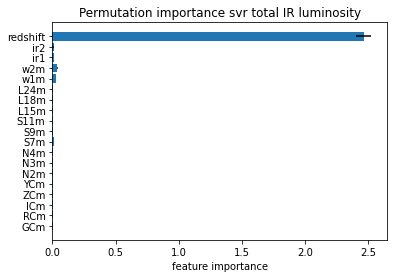

In [58]:
x=np.array([i for i in range(19)])
# r['importances_std']

lir_trainsz=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','redshift']
plt.barh(lir_trainsz,r['importances_mean'],xerr=r['importances_std'])
plt.xlabel('feature importance')
plt.title('Permutation importance svr total IR luminosity')
# plt.savefig('Permutation importance svr total IR luminosity in log scale')

In [70]:
def svr_train(X=lirtrain,y=lirtarget,w=1,C=1,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    rmse=[]
    result=[]
    trainind=[]
    testind=[]
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]   #set the train test dataset
        result_svr=svr.fit(X_train,y_train).predict(X_test),svr.fit(X_train,y_train).predict(X_train) 
        result+=result_svr[0], y_test,result_svr[1], y_train
#         print(result)
        mse=sklearn.metrics.mean_squared_error(y_test,result_svr[0]),sklearn.metrics.mean_squared_error(y_train,result_svr[1])
        rmse+=[(math.sqrt(mse[0]),math.sqrt(mse[1]))]
#         print(mse,rmse)
        trainind.append(train_index)
        testind.append(test_index)

    #print(rmse)
    #rmse[0][1]
 
    return np.mean([i[0] for i in rmse]),np.mean([i[1] for i in rmse]),rmse,result,kernel,trainind,testind

In [101]:
re=svr_train(X=lirtrain,y=lirtarget,C=21.54434690031882, gamma=0.01)

In [102]:
re[:2]

(0.5525644316674342, 0.2692919957188107)

In [74]:
def heatmap(X=lirtrain,y=lirtarget,C=np.logspace(-1,2,10),gamma=np.logspace(-2,0,10),kernel='rbf',n_splits=10,test_ratio=0.1):
    grid=np.zeros((len(C),len(gamma))),np.zeros((len(C),len(gamma)))
#     grid_rbf1=np.zeros((len(C),len(gamma)))
    
    for i,c in enumerate(C):
        for j,g in enumerate(gamma):
            grid[0][i,j],grid[1][i,j]=svr_train(X=X,y=y,C=c,gamma=g, kernel=kernel,
                                                  n_splits=n_splits, test_ratio=test_ratio)[:2]
        print (i , j)

    min_ind, vtestmin=np.argmin(grid[0]), np.min(grid[0])
    Cmin=C[min_ind%100//10]
    gmin=gamma[min_ind%10]
    vtrain=grid[1][min_ind%100//10][min_ind%10]
    
    return grid,kernel,Cmin,gmin,vtestmin,vtrain

In [94]:
hre=heatmap(X=loglirtrain,y=lirtarget)

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


In [95]:
hre[-4:]

(100.0, 0.027825594022071243, 0.3281630384768559, 0.31148120563508663)

In [96]:
hre[0]

(array([[0.59607358, 0.5119568 , 0.44499983, 0.40378063, 0.38263818,
         0.37762856, 0.38304598, 0.40173475, 0.43734664, 0.48879404],
        [0.46905267, 0.41100594, 0.38036124, 0.36568109, 0.35706902,
         0.35457415, 0.36059442, 0.37243416, 0.3953491 , 0.44014421],
        [0.3892211 , 0.37076817, 0.35952302, 0.35015918, 0.34419051,
         0.34314244, 0.34843705, 0.35703992, 0.3715214 , 0.40213033],
        [0.36626713, 0.35791515, 0.34892339, 0.34108547, 0.33737421,
         0.33760925, 0.34046511, 0.34663551, 0.35997299, 0.38194258],
        [0.35804237, 0.34946767, 0.34112638, 0.3366326 , 0.33371614,
         0.33359322, 0.33575271, 0.34027221, 0.35042396, 0.37075242],
        [0.35105599, 0.34191083, 0.33656702, 0.33307312, 0.33106562,
         0.33208661, 0.33385075, 0.3385397 , 0.34848404, 0.36977084],
        [0.34391847, 0.33693572, 0.33375562, 0.33107864, 0.33075229,
         0.33099807, 0.33475954, 0.34035449, 0.35400165, 0.37124699],
        [0.3379345 , 0.3342

In [39]:
hres=heatmap(X=lirsz,y=lirtargetsz)

In [40]:
hres[-4:]

(46.41588833612777,
 0.027825594022071243,
 0.2785186206900466,
 0.25503547437827223)

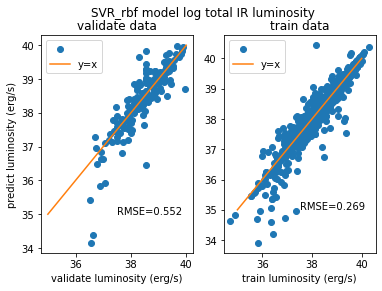

In [104]:
# re=svr_train(X=loglirtrain,y=lirtarget,C=100, gamma=0.027825594022071243)

result_imp_svr_250_3,result_imp_svr_250_0,result_imp_svr_250_1=re[3],re[0],re[1]
fig,ax = plt.subplots(1,2)
plt.suptitle('SVR_rbf model log total IR luminosity')
x = np.linspace(0, 5, 1000)
ax[0].plot(result_imp_svr_250_3[0],result_imp_svr_250_3[1],'o')
ax[0].plot(x+35, x+35, linestyle='solid')
ax[0].set_xlabel('validate luminosity (erg/s)')
ax[0].set_ylabel('predict luminosity (erg/s)')
ax[0].legend(['','y=x'])
ax[0].set_title('validate data')
ax[0].text(37.5,35,'RMSE='+str(result_imp_svr_250_0)[0:5])

ax[1].plot(result_imp_svr_250_3[2],result_imp_svr_250_3[3],'o')
ax[1].plot(x+35, x+35 , linestyle='solid')
ax[1].set_xlabel('train luminosity (erg/s)')
#ax[1].set_ylabel('predict flux(mag)')
ax[1].legend(['','y=x'])
ax[1].set_title('train data')
ax[1].text(37.5,35,'RMSE='+str(result_imp_svr_250_1)[0:5])

# svr_lin.get_params(deep=True)
# svr_lin_r=svr_lin.score(X_test,y_test),svr_lin.score(X_train,y_train)
#print(svr_r)

# plt.savefig('SVR_rbf model log total IR luminosity standard scale')

In [165]:
def svr_result(X=lirsz,y=lirtargetsz,test=testz_imp,C=100,gamma=0.1,epsilon=0.1,kernel='rbf',n_splits=10,test_ratio=0.1,train_ratio=0.9,random_state=0):
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)
#     ss = ShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=0)
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=0)
    kf.get_n_splits(X)
    result=[]
    
    for train_index, test_index in kf.split(X):
        #print("%s %s" % (train_index, test_index))
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]    #set the train test dataset
        result_svr=svr.fit(X_train,y_train).predict(test)
#         print(result_svr)
        result.append(result_svr)
#         print(result)

    df_result=pd.DataFrame(data=result)
    df_result=df_result.T
    df=pd.concat([df_result,df_result.mean(axis=1),df_result.std(axis=1)],axis=1)
#     print(df)
    col=['1','2','3','4','5','6','7','8','9','10','mean','std']
    df.columns=col
    df['rmse']=0
    df['mse']=0
    df['mae']=0
    df['mape']=0
    xa=col[:-2]
#     print(xa)
    for i in xa:
        df['rmse']+=(df['mean']-df[i])**2
        df['mse']+=(df['mean']-df[i])**2
        df['mae']+=(df['mean']-df[i]).abs()
        df['mape']+=(df['mean']-df[i]).abs()
    df['rmse']=(df['rmse']/10)**0.5
    df['mae']=df['mae']/10
    df['mape']= df['mape']/df['mean']*100
    # df['mean']==df['a']
#     df
    
    

    return df,df_result

In [166]:
re=svr_result(X=lirtrain,y=lirtarget,C=46.41588833612777, gamma=0.0278255940220712431)

In [167]:
re[0]

,1,2,3,4,5,6,7,8,9,10,mean,std,rmse,mse,mae,mape
0,38.202395,38.201951,38.214643,38.205151,38.220155,38.217953,38.208349,38.216635,38.208386,38.221903,38.211752,0.007412,0.007031,0.000494,0.006506,0.170253
1,39.626253,39.612184,39.619304,39.616027,39.629024,39.625843,39.618078,39.606114,39.630096,39.641320,39.622424,0.010145,0.009624,0.000926,0.008083,0.203998
2,37.966689,37.972192,37.980929,37.973540,37.982889,37.979295,37.976994,37.987650,37.975979,37.982234,37.977839,0.006070,0.005759,0.000332,0.004761,0.125350
3,38.296705,38.301057,38.310753,38.300680,38.316125,38.310994,38.302969,38.312907,38.305620,38.317360,38.307517,0.007089,0.006725,0.000452,0.006111,0.159521
4,38.989027,38.983170,38.995240,38.986217,39.000846,38.993969,38.991642,38.984033,38.992456,39.007653,38.992425,0.007600,0.007210,0.000520,0.005607,0.143809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67640,39.473088,39.454477,39.468977,39.477682,39.468047,39.475347,39.476452,39.461567,39.471717,39.483423,39.471078,0.008348,0.007920,0.000627,0.006249,0.158310
67641,39.373812,39.355956,39.369297,39.371286,39.374285,39.378264,39.373126,39.361206,39.374046,39.387106,39.371838,0.008582,0.008142,0.000663,0.005922,0.150402
67642,39.420115,39.408831,39.419440,39.413369,39.425919,39.423023,39.418482,39.407665,39.423585,39.435957,39.419638,0.008392,0.007962,0.000634,0.006081,0.154270
67643,40.278973,40.247932,40.261430,40.253900,40.272536,40.262445,40.256759,40.235621,40.280223,40.284993,40.263481,0.015724,0.014917,0.002225,0.012560,0.311948


In [42]:
re[0]['1'][:50]

0     39.221359
1     39.221359
2     39.221359
3     39.221359
4     39.221359
5     39.221359
6     39.221359
7     39.221359
8     39.221359
9     39.221359
10    39.221359
11    39.221359
12    39.221359
13    39.221359
14    39.221359
15    39.221359
16    39.221359
17    39.221359
18    39.221359
19    39.221359
20    39.221359
21    39.221359
22    39.221359
23    39.221359
24    39.221359
25    39.221359
26    39.221359
27    39.221359
28    39.221359
29    39.221359
30    39.221359
31    39.221359
32    39.221359
33    39.221359
34    39.221359
35    39.221359
36    39.221359
37    39.221359
38    39.221359
39    39.221359
40    39.221359
41    39.221359
42    39.221359
43    39.221359
44    39.221359
45    39.221359
46    39.221359
47    39.221359
48    39.221359
49    39.221359
Name: 1, dtype: float64

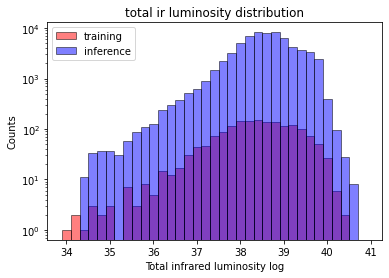

In [173]:
from sklearn import neighbors
n_neighbors=20

# knn=neighbors.KNeighborsRegressor(n_neighbors,weights='distance',p=19)

# # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

# X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
# Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

# knnre=knn.fit(X,y=target250['m250']).predict(Yz)

binwidth=0.2
data=re[0]['mean']
# bins=np.arange(np.min(data), np.max(data) + binwidth, binwidth)
# plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

data1=lirtarget
binmin=np.min([np.min(data),np.min(data1)])
binmax=np.max([np.max(data),np.max(data1)])
bins=np.arange(binmin,binmax+2*binwidth,binwidth)


plt.hist(lirtarget,bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
plt.hist(data,bins=bins,label='inference',edgecolor = 'black',color='b',alpha=0.5)
plt.semilogy()
plt.legend()
plt.xlabel('Total infrared luminosity log (erg/s)')
plt.ylabel('Counts')
plt.title('total ir luminosity distribution')
# max(target250['m250']),min(target250['m250'])
# plt.savefig('result/distribution/total ir luminosity distribution')

In [ ]:
w=np.logspace(0,2,10)
j=0
for i in w:
    fig, axs = plt.subplots(1,figsize=(10,5))
    C=0.464
    gamma=0.07
    epsilon=0.1
    w=2.54
    kernel='rbf'
    svr = SVR(kernel=kernel, C=C, gamma=gamma , epsilon=epsilon)

    # knnre=knn.fit(train250z,y=target250['m250']).predict(testz_imp)

    # X=train250z[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]
    # Yz=testz_imp[['N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','z']]

    X=train250z
    Y=testz_imp
#     weight=np.abs(np.random.randn(1800))

    svrre=svr.fit(X,y=target250['m250'],sample_weight=df_weight*i).predict(Y)

    binwidth=0.2
    data=target250['m250']
    data1=svrre
    binmin=np.min([np.min(data),np.min(data1)])
    binmax=np.max([np.max(data),np.max(data1)])
    bins=np.arange(binmin,binmax+2*binwidth,binwidth)


    # plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    axs.hist(target250['m250'],bins=bins,label='training',edgecolor = 'black',color='r',alpha=0.5)
    axs.hist(svrre,bins=bins,label='svr weight inference',edgecolor = 'black',color='b',alpha=0.5)
    axs.semilogy()
    axs.legend()
    axs.set_title('svr weight target250 flux distribution C0=0.464 w=%s'%(i))
    max(target250['m250']),min(target250['m250'])
#     plt.savefig('result/distribution/svr weight target250 flux distribution')
    plt.savefig('result/distribution/svr weight log distribution C0=0464 w%s'%(j))
    j=j+1

In [6]:
#read data
df99 = pd.read_csv('data/akari_data.csv', low_memory=False)

In [7]:
df = df99.replace(99,np.NaN) #replace Nan to missing data
df = df[df['fl1']==1] #selecct the galaxy

In [8]:
train_flux=['GCm','RCm','ICm','ZCm','YCm','N2m','N3m','N4m','S7m','S9m','S11m','L15m','L18m','L24m','w1m','w2m','ir1','ir2','specz','photz']
target_flux=['m250','m350','m500']
train_error=['GCme','RCme','ICme','ZCme','YCme','N2me','N3me','N4me','S7me','S9me','S11me','L15me','L18me','L24me','w1me','w2me','ir1e','ir2e']
target_error=['m250e','m350e','m500e']

In [25]:
len(train_flux)

20

In [37]:
spec_train=df[train_flux[:-1]][df['specz']>-1]
spec_target=df[target_flux][df['specz']>-1]


spec_target_250=spec_target['m250'].dropna()
spec_target_350=spec_target['m350'].dropna()
spec_target_500=spec_target['m500'].dropna()

spec_train_250=spec_train.loc[spec_target_250.index]
spec_train_350=spec_train.loc[spec_target_350.index]
spec_train_500=spec_train.loc[spec_target_500.index]

spec_train_250=spec_train_250[spec_train_250.count(axis='columns')>18]
spec_train_350=spec_train_350[spec_train_350.count(axis='columns')>18]
spec_train_500=spec_train_500[spec_train_500.count(axis='columns')>18]

# spec_target_250=spec_target_250['m250'].loc[spec_train_250.index].to_frame()
# spec_target_350=spec_target_350['m350'].loc[spec_train_350.index].to_frame()
# spec_target_500=spec_target_500['m500'].loc[spec_train_500.index].to_frame()


spec_target_250=spec_target_250.loc[spec_train_250.index].to_frame()
spec_target_350=spec_target_350.loc[spec_train_350.index].to_frame()
spec_target_500=spec_target_500.loc[spec_train_500.index].to_frame()

# spec_train_250.to_csv('data/specz/spec_train_250.csv')
# spec_train_350.to_csv('data/specz/spec_train_350.csv')
# spec_train_500.to_csv('data/specz/spec_train_500.csv')

# spec_target_250.to_csv('data/specz/spec_target_250.csv')
# spec_target_350.to_csv('data/specz/spec_target_350.csv')
# spec_target_500.to_csv('data/specz/spec_target_500.csv')

In [38]:
spec_target

,m250,m350,m500
83,NaN,NaN,NaN
101,NaN,NaN,NaN
178,NaN,NaN,NaN
186,NaN,NaN,NaN
236,NaN,NaN,NaN
...,...,...,...
90655,NaN,NaN,NaN
90678,NaN,NaN,NaN
90737,NaN,NaN,NaN
90879,NaN,NaN,NaN


In [6]:
df_train=df[train_flux]
df_target=df[target_flux]
df_trainerr=df[train_error]
df_targeterr=df[target_error]
# df_train.to_csv('data/training set.csv')
# df_target.to_csv('data/target set.csv')
# df_trainerr.to_csv('data/train error.csv')
# df_targeterr.to_csv('data/target error.csv')

In [7]:
df_target250=df_target['m250']
df_target350=df_target['m350']
df_target500=df_target['m500']

df_target250=df_target250.dropna()
df_target350=df_target350.dropna()
df_target500=df_target500.dropna()

df_target250=df_target250[df_target250<14]
df_target350=df_target350[df_target350<14.2]
df_target500=df_target500[df_target500<13.8]

# df_target250.to_csv('data/target250.csv')
# df_target350.to_csv('data/target350.csv')
# df_target500.to_csv('data/target500.csv')

df_targeterr250=df_targeterr['m250e'].loc[df_target250.index]
df_targeterr350=df_targeterr['m350e'].loc[df_target350.index]
df_targeterr500=df_targeterr['m500e'].loc[df_target500.index]

# df_targeterr250.to_csv('data/targeterr250.csv')
# df_targeterr350.to_csv('data/targeterr350.csv')
# df_targeterr500.to_csv('data/targeterr500.csv')

In [8]:
df_target_mix=pd.concat([df_target250,df_target350,df_target500],axis=1)
# df_target_mix
df_train=df_train[train_flux[:-2]]
df_train_imp=df_train.loc[df_target_mix.index]

In [9]:
xgb_train250=df_train.loc[df_target250.index]
xgb_train350=df_train.loc[df_target350.index]
xgb_train500=df_train.loc[df_target500.index]

# xgb_train250.to_csv('data/xgbtrain250.csv')
# xgb_train350.to_csv('data/xgbtrain350.csv')
# xgb_train500.to_csv('data/xgbtrain500.csv')

xgb_trainerr250=df_trainerr.loc[df_target250.index]
xgb_trainerr350=df_trainerr.loc[df_target350.index]
xgb_trainerr500=df_trainerr.loc[df_target500.index]

# xgb_trainerr250.to_csv('data/xgbtrainerr250.csv')
# xgb_trainerr350.to_csv('data/xgbtrainerr350.csv')
# xgb_trainerr500.to_csv('data/xgbtrainerr500.csv')







In [50]:
z=pd.read_csv('data/z.csv',low_memory=False,index_col=0)
testz=pd.concat([df_train,z],axis=1)
# testz.to_csv('data/testz.csv')

In [10]:
#missing data
imp = IterativeImputer(max_iter=1000, random_state=0,sample_posterior=True)
imp.fit(df_train_imp)

KeyboardInterrupt: 

In [ ]:
df_train_imp=imp.transform(df_train_imp) #type is np.array
df_train_imp=pd.DataFrame(data=df_train_imp,columns=train_flux[:-2],index=pd.Index(df_target_mix.index))

In [55]:
df_test_imp=imp.transform(df_train)
df_test_imp=pd.DataFrame(data=df_test_imp,columns=train_flux[:-2])

In [47]:
# df_train_imp.to_csv('data/train_imp.csv')
# df_test_imp.to_csv('data/test_imp.csv')

In [46]:
df_train250=df_train_imp.reindex(pd.Index(df_target250.index))
df_train350=df_train_imp.reindex(pd.Index(df_target350.index))
df_train500=df_train_imp.reindex(pd.Index(df_target500.index))
# df_train250.to_csv('data/train250.csv')
# df_train350.to_csv('data/train350.csv')
# df_train500.to_csv('data/train500.csv')

In [48]:
df_trainerr_imp=df_trainerr.loc[df_target_mix.index]
#missing data
imperr = IterativeImputer(max_iter=1000, random_state=0,sample_posterior=True)
imperr.fit(df_trainerr_imp)

IterativeImputer(max_iter=1000, random_state=0, sample_posterior=True)

In [49]:
df_trainerr_imp=imperr.transform(df_trainerr_imp)
df_trainerr_imp=pd.DataFrame(data=df_trainerr_imp,columns=train_error,index=pd.Index(df_target_mix.index))

In [53]:
df_testerr_imp=imperr.transform(df_trainerr)
df_testerr_imp=pd.DataFrame(data=df_testerr_imp,columns=train_error)

In [16]:
df_testerr_imp

,GCme,RCme,ICme,ZCme,YCme,N2me,N3me,N4me,S7me,S9me,S11me,L15me,L18me,L24me,w1me,w2me,ir1e,ir2e
0,0.014,0.005,0.010000,0.017000,0.021000,0.065000,0.059000,0.079000,0.854306,0.089000,0.093000,4.238298,4.481342,7.226003,0.058000,0.122000,0.054000,0.048000
1,0.152,0.174,0.279000,0.159657,0.247000,-1.402775,0.115000,0.121000,5.091689,6.999206,8.838239,10.043947,10.065021,11.305695,0.206000,0.218000,0.711702,0.767933
2,0.004,0.001,0.002000,0.004000,0.005000,0.022000,0.022000,0.032000,0.075418,0.120000,1.758754,2.684857,0.126000,4.850728,0.032000,0.053000,0.025000,0.024000
3,0.007,0.004,0.004000,0.007000,0.006000,0.082000,0.081000,0.095000,0.828889,1.740827,2.247648,0.109000,2.993678,5.942613,0.064000,0.182000,0.054000,0.069000
4,0.079,0.040,0.047000,0.051000,0.058000,0.072000,0.052000,0.067000,5.511729,7.310214,8.697908,9.247705,9.087889,11.638285,0.044000,0.101000,0.043000,0.051000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,0.061,0.305,0.157000,0.277000,1.536292,6.168195,7.497905,8.224788,5.292087,3.810953,4.608219,4.087843,0.027000,0.092000,7.242014,6.956045,7.361164,7.590189
67706,0.038,0.141,0.153000,0.183000,1.177489,5.706378,7.641428,8.091109,6.150587,4.652311,5.151360,4.730618,0.058000,5.299215,6.679502,6.334393,7.448606,7.325924
67707,0.108,0.219,2.164593,3.705124,4.780667,11.771469,14.500312,16.385886,17.079678,15.766571,15.382496,16.244719,16.990519,16.963516,14.600050,16.053041,14.977963,15.882312
67708,0.143,0.090,-0.147925,0.188000,1.070564,5.949226,7.769256,8.354935,6.159147,4.059950,4.842302,3.809150,0.083000,5.414704,6.528220,5.491381,7.000415,6.935435


In [54]:
# df_trainerr_imp.to_csv('data/trainerr_imp.csv')
# df_testerr_imp.to_csv('data/testerr_imp.csv')

In [52]:
df_trainerr250=df_trainerr_imp.loc[df_target250.index]
df_trainerr350=df_trainerr_imp.loc[df_target350.index]
df_trainerr500=df_trainerr_imp.loc[df_target500.index]
# df_trainerr250.to_csv('data/trainerr250.csv')
# df_trainerr350.to_csv('data/trainerr350.csv')
# df_trainerr500.to_csv('data/trainerr500.csv')

In [248]:
z=df[train_flux[-2:]]
specz=z[z['specz']!=-1]['specz']
photz=z[z['specz']==-1]['photz']
z=pd.concat([specz,photz])
z=z.sort_index()
z=pd.DataFrame(z,columns=['z'])
# z.to_csv('data/z.csv')

In [249]:
df_train_imp_z=pd.concat([df_train_imp, z], axis=1)

In [254]:
df_train250z=df_train_imp_z.reindex(pd.Index(df_target250.index))
df_train350z=df_train_imp_z.reindex(pd.Index(df_target350.index))
df_train500z=df_train_imp_z.reindex(pd.Index(df_target500.index))

# df_train250z.to_csv('data/train250 with z.csv')
# df_train350z.to_csv('data/train350 with z.csv')
# df_train500z.to_csv('data/train500 with z.csv')


In [42]:
# train_imp = pd.read_csv('data/train_imp.csv',low_memory=False,index_col=0)
test_imp = pd.read_csv('data/test_imp.csv',low_memory=False,index_col=0)
# trainerr_imp = pd.read_csv('data/trainerr_imp.csv',low_memory=False,index_col=0)
testerr_imp = pd.read_csv('data/testerr_imp.csv',low_memory=False,index_col=0)

z=pd.read_csv('data/z.csv',low_memory=False,index_col=0)
z.index = range(len(z))

In [44]:
test_imp_z=pd.concat([test_imp,z], axis=1)

In [47]:
# test_imp_z
test_imp_z.to_csv('data/test_imp_z.csv')

In [34]:
test_imp

,GCm,RCm,ICm,ZCm,YCm,N2m,N3m,N4m,S7m,S9m,S11m,L15m,L18m,L24m,w1m,w2m,ir1,ir2
0,23.481,21.951,21.276000,20.823000,20.353000,19.743000,19.761000,19.981000,20.035586,18.295000,17.872000,17.958133,18.181155,19.546483,19.950000,20.125000,19.926000,19.899000
1,26.554,25.860,25.340000,24.684173,23.924000,20.876743,20.327000,20.488000,21.273808,19.930666,18.985908,17.986864,17.066079,16.957309,21.471000,20.717000,21.103990,20.320064
2,21.705,20.215,19.425000,19.104000,18.851000,18.129000,18.390000,18.999000,19.816078,18.816000,18.165514,18.451043,18.180000,17.662294,18.570000,18.930000,18.578000,18.629000
3,23.230,21.963,20.791000,20.283000,20.135000,19.846000,19.969000,20.292000,19.918274,20.216799,19.141640,17.633000,18.425410,18.861494,19.999000,20.528000,19.500000,19.559000
4,25.489,24.316,23.002000,22.256000,21.737000,19.390000,19.018000,19.693000,20.352496,19.140361,18.201473,18.713837,18.201302,17.666628,19.369000,19.830000,19.292000,19.272000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67705,25.607,26.476,25.021000,24.697000,24.021263,20.185611,19.273140,18.596616,18.272062,18.642593,17.711090,16.136083,15.861000,16.388000,19.569712,18.863089,19.097859,18.283329
67706,26.014,26.075,25.452000,24.967000,24.655311,21.450084,20.874743,20.453667,19.467239,18.317585,17.560884,16.860255,16.671000,16.633859,20.778428,19.841193,20.271951,19.535944
67707,27.203,26.535,25.506092,24.784231,24.312535,20.994403,20.610906,20.125717,20.475899,19.960054,19.272493,17.904458,17.304297,16.718707,21.003361,20.744431,19.984328,20.083644
67708,27.464,25.471,25.223723,24.880000,24.348109,21.333444,20.373441,20.074025,18.641485,18.692440,17.787427,17.754842,17.263000,16.632535,20.488595,19.768181,20.273386,19.185252


In [43]:
z

,z
0,0.562
1,2.270
2,0.385
3,0.626
4,1.161
...,...
67705,1.673
67706,1.711
67707,1.863
67708,3.746
